In [1]:
import sys
sys.path.append('../')

from glob import glob
import os
from tqdm import tqdm
import numpy as np

from EM import NiftiManager, Evaluate, EM, ElastixTransformix, FileManager, BrainAtlasManager
from utils.fusion import majority_voting_fusion

# To allow auto reload to this notebook after modifying any external file imported
%load_ext autoreload
%autoreload 2

In [2]:
NM    = NiftiManager()
EVAL  = Evaluate()
ET    = ElastixTransformix()
FM    = FileManager()
BM    = BrainAtlasManager()

In [3]:
print(os.listdir('./output/'))
print(os.listdir('./output/images'))
print(os.listdir('./output/labels'))

['images', 'labels']
['output_IBSR_11', 'output_IBSR_12', 'output_IBSR_13', 'output_IBSR_14', 'output_IBSR_17']
['output_IBSR_11', 'output_IBSR_12', 'output_IBSR_13', 'output_IBSR_14', 'output_IBSR_17']


In [4]:
labels_path_output_IBSR_11 = './output/labels/output_IBSR_11/'
labels_output_IBSR_11 = sorted(glob(os.path.join(labels_path_output_IBSR_11, "IBSR_**_seg", "*.nii"), recursive=True))

In [5]:
labels_output_IBSR_11

['./output/labels/output_IBSR_11\\IBSR_01_seg\\result.nii',
 './output/labels/output_IBSR_11\\IBSR_03_seg\\result.nii',
 './output/labels/output_IBSR_11\\IBSR_04_seg\\result.nii',
 './output/labels/output_IBSR_11\\IBSR_05_seg\\result.nii',
 './output/labels/output_IBSR_11\\IBSR_06_seg\\result.nii',
 './output/labels/output_IBSR_11\\IBSR_07_seg\\result.nii',
 './output/labels/output_IBSR_11\\IBSR_08_seg\\result.nii',
 './output/labels/output_IBSR_11\\IBSR_09_seg\\result.nii',
 './output/labels/output_IBSR_11\\IBSR_16_seg\\result.nii',
 './output/labels/output_IBSR_11\\IBSR_18_seg\\result.nii']

In [6]:
mean_csf, mean_gm, mean_wm = majority_voting_fusion(labels_output_IBSR_11, NM.load_nifti)

In [7]:
print(mean_csf.shape)


(256, 128, 256)


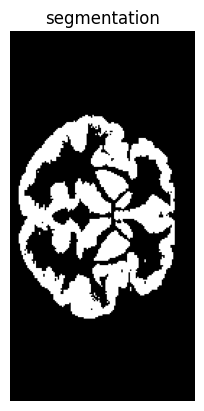

0.7402327005508307 0.876239362178618 0.7857796579145273


In [10]:
# segmenting using those atlases
IBSR_11 = '../TrainingValidationTestSets/Validation_Set/IBSR_11/IBSR_11.nii.gz'
IBSR_11_label = '../TrainingValidationTestSets/Validation_Set/IBSR_11/IBSR_11_seg.nii.gz'

IBSR_11_nifti = NM.load_nifti(IBSR_11)[0]
IBSR_11_label = NM.load_nifti(IBSR_11_label)[0]

segmented_image, concatenated_atlas = BM.segment_using_tissue_atlas(IBSR_11_nifti, IBSR_11_label[:,:,:,0], mean_csf, mean_gm, mean_wm)

NM.show_nifti(segmented_image==2, 'segmentation', 129)

# evaluating the segmentation
CSF_dice = EVAL.calc_dice_coefficient(segmented_image==1, IBSR_11_label==1)
GM_dice = EVAL.calc_dice_coefficient(segmented_image==2, IBSR_11_label==2)
WM_dice = EVAL.calc_dice_coefficient(segmented_image==3, IBSR_11_label==3)

print(CSF_dice, GM_dice, WM_dice)